In [1]:
!ls

datalab


# Downloading the Dataset from Kaggle using Kaggle CLI

In [2]:
# Install the Kaggle CLI
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [3]:
# Import kaggle.json from google drive
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

[{'id': '16pkheSqwSEw8Q9YBA7wYdxb791hVE-9I'}]
Download 100%.


In [4]:
# Download the dataset from the competition Planet: Understanding the Amazon from Space
!kaggle competitions download -c planet-understanding-the-amazon-from-space -w -f train-jpg.tar.7z
!kaggle competitions download -c planet-understanding-the-amazon-from-space -w -f test-jpg.tar.7z
!kaggle competitions download -c planet-understanding-the-amazon-from-space -w -f train_v2.csv.zip
!ls

train-jpg.tar.7z: Downloaded 600MB of 600MB to .
test-jpg.tar.7z: Downloaded 603MB of 603MB to .
train_v2.csv.zip: Downloaded 159KB of 159KB to .
datalab  test-jpg.tar.7z  train-jpg.tar.7z  train_v2.csv.zip


In [5]:
# Extract the 7z and tar files to get the images
# Installing p7zip
!apt-get install p7zip-full
# Extracting Test Data
!p7zip -d test-jpg.tar.7z
!tar -xvf test-jpg.tar
# Extracting Train Data
!p7zip -d train-jpg.tar.7z
!tar -xvf train-jpg.tar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,467 kB of archives.
After this operation, 5,415 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip amd64 16.02+dfsg-4 [348 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip-full amd64 16.02+dfsg-4 [1,119 kB]
Fetched 1,467 kB in 0s (1,592 kB/s)
Selecting previously unselected package p7zip.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip (16.02+dfsg-4) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip-full 

                    32% - test-jpg.tar                    33% - test-jpg.tar                    34% - test-jpg.tar                    35% - test-jpg.tar                    36% - test-jpg.tar                    37% - test-jpg.tar                    38% - test-jpg.tar                    39% - test-jpg.tar                    40% - test-jpg.tar                    41% - test-jpg.tar                    42% - test-jpg.tar                    43% - test-jpg.tar                    44% - test-jpg.tar

                    82% - test-jpg.tar                    83% - test-jpg.tar                    84% - test-jpg.tar                    85% - test-jpg.tar                    86% - test-jpg.tar                    87% - test-jpg.tar                    88% - test-jpg.tar                    89% - test-jpg.tar                    90% - test-jpg.tar                    91% - test-jpg.tar                    92% - test-jpg.tar                    93% - test-jpg.tar                    94% - test-jpg.tar

test-jpg/test_13996.jpg
test-jpg/test_10602.jpg
test-jpg/test_40403.jpg
test-jpg/test_1540.jpg
test-jpg/test_2801.jpg
test-jpg/test_38559.jpg
test-jpg/test_32698.jpg
test-jpg/test_30789.jpg
test-jpg/test_2949.jpg
test-jpg/test_94.jpg
test-jpg/test_13542.jpg
test-jpg/test_16253.jpg
test-jpg/test_27992.jpg
test-jpg/test_21251.jpg
test-jpg/test_32550.jpg
test-jpg/test_39608.jpg
test-jpg/test_27855.jpg
test-jpg/test_15695.jpg
test-jpg/test_31730.jpg
test-jpg/test_24430.jpg
test-jpg/test_35070.jpg
test-jpg/test_24834.jpg
test-jpg/test_14756.jpg
test-jpg/test_12427.jpg
test-jpg/test_24769.jpg
test-jpg/test_37038.jpg
test-jpg/test_6532.jpg
test-jpg/test_11940.jpg
test-jpg/test_6936.jpg
test-jpg/test_27877.jpg
test-jpg/test_2995.jpg
test-jpg/test_38125.jpg
test-jpg/test_29432.jpg
test-jpg/test_8429.jpg
test-jpg/test_34183.jpg
test-jpg/test_12804.jpg
test-jpg/test_29886.jpg
test-jpg/test_37814.jpg
test-jpg/test_7273.jpg
test-jpg/test_25495.jpg
test-jpg/test_39508.jpg
test-jpg/test_15470.jpg
tes

test-jpg/test_20208.jpg
test-jpg/test_28582.jpg
test-jpg/test_5685.jpg
test-jpg/test_32695.jpg
test-jpg/test_38740.jpg
test-jpg/test_34850.jpg
test-jpg/test_10000.jpg
test-jpg/test_14403.jpg
test-jpg/test_15365.jpg
test-jpg/test_36589.jpg
test-jpg/test_4210.jpg
test-jpg/test_2781.jpg
test-jpg/test_7100.jpg
test-jpg/test_38759.jpg
test-jpg/test_16138.jpg
test-jpg/test_20915.jpg
test-jpg/test_7359.jpg
test-jpg/test_13255.jpg
test-jpg/test_39226.jpg
test-jpg/test_11173.jpg
test-jpg/test_33036.jpg
test-jpg/test_19157.jpg
test-jpg/test_13219.jpg
test-jpg/test_1638.jpg
test-jpg/test_40565.jpg
test-jpg/test_40413.jpg
test-jpg/test_3133.jpg
test-jpg/test_26893.jpg
test-jpg/test_29180.jpg
test-jpg/test_2330.jpg
test-jpg/test_13271.jpg
test-jpg/test_34871.jpg
test-jpg/test_5649.jpg
test-jpg/test_82.jpg
test-jpg/test_17665.jpg
test-jpg/test_20293.jpg
test-jpg/test_22914.jpg
test-jpg/test_11238.jpg
test-jpg/test_29582.jpg
test-jpg/test_16393.jpg
test-jpg/test_39446.jpg
test-jpg/test_31444.jpg
test

test-jpg/test_40384.jpg
test-jpg/test_6432.jpg
test-jpg/test_16023.jpg
test-jpg/test_27017.jpg
test-jpg/test_5853.jpg
test-jpg/test_18291.jpg
test-jpg/test_37433.jpg
test-jpg/test_23201.jpg
test-jpg/test_22007.jpg
test-jpg/test_24966.jpg
test-jpg/test_15655.jpg
test-jpg/test_27120.jpg
test-jpg/test_4599.jpg
test-jpg/test_26937.jpg
test-jpg/test_32666.jpg
test-jpg/test_37709.jpg
test-jpg/test_9001.jpg
test-jpg/test_5091.jpg
test-jpg/test_12012.jpg
test-jpg/test_22226.jpg
test-jpg/test_7518.jpg
test-jpg/test_39592.jpg
test-jpg/test_39877.jpg
test-jpg/test_2515.jpg
test-jpg/test_37212.jpg
test-jpg/test_24313.jpg
test-jpg/test_26710.jpg
test-jpg/test_34421.jpg
test-jpg/test_24581.jpg
test-jpg/test_10297.jpg
test-jpg/test_14484.jpg
test-jpg/test_3325.jpg
test-jpg/test_22306.jpg
test-jpg/test_35431.jpg
test-jpg/test_30034.jpg
test-jpg/test_39016.jpg
test-jpg/test_12458.jpg
test-jpg/test_36826.jpg
test-jpg/test_32703.jpg
test-jpg/test_24432.jpg
test-jpg/test_13068.jpg
test-jpg/test_3066.jpg
t

test-jpg/test_25262.jpg
test-jpg/test_5328.jpg
test-jpg/test_8059.jpg
test-jpg/test_35706.jpg
test-jpg/test_10604.jpg
test-jpg/test_14464.jpg
test-jpg/test_24803.jpg
test-jpg/test_8973.jpg
test-jpg/test_8421.jpg
test-jpg/test_28520.jpg
test-jpg/test_17822.jpg
test-jpg/test_29671.jpg
test-jpg/test_28753.jpg
test-jpg/test_13517.jpg
test-jpg/test_37381.jpg
test-jpg/test_14218.jpg
test-jpg/test_37607.jpg
test-jpg/test_26205.jpg
test-jpg/test_11983.jpg
test-jpg/test_11521.jpg
test-jpg/test_20534.jpg
test-jpg/test_33309.jpg
test-jpg/test_17914.jpg
test-jpg/test_17455.jpg
test-jpg/test_17797.jpg
test-jpg/test_33428.jpg
test-jpg/test_19500.jpg
test-jpg/test_26694.jpg
test-jpg/test_17238.jpg
test-jpg/test_29469.jpg
test-jpg/test_27668.jpg
test-jpg/test_39559.jpg
test-jpg/test_33566.jpg
test-jpg/test_34506.jpg
test-jpg/test_4264.jpg
test-jpg/test_3859.jpg
test-jpg/test_2715.jpg
test-jpg/test_15462.jpg
test-jpg/test_735.jpg
test-jpg/test_28901.jpg
test-jpg/test_23596.jpg
test-jpg/test_35968.jpg
t

test-jpg/test_33905.jpg
test-jpg/test_15965.jpg
test-jpg/test_33047.jpg
test-jpg/test_23655.jpg
test-jpg/test_12163.jpg
test-jpg/test_13147.jpg
test-jpg/test_16327.jpg
test-jpg/test_24278.jpg
test-jpg/test_18219.jpg
test-jpg/test_25292.jpg
test-jpg/test_40445.jpg
test-jpg/test_17398.jpg
test-jpg/test_5290.jpg
test-jpg/test_17967.jpg
test-jpg/test_12602.jpg
test-jpg/test_5497.jpg
test-jpg/test_4370.jpg
test-jpg/test_32548.jpg
test-jpg/test_38278.jpg
test-jpg/test_11731.jpg
test-jpg/test_29224.jpg
test-jpg/test_10836.jpg
test-jpg/test_30894.jpg
test-jpg/test_34039.jpg
test-jpg/test_18149.jpg
test-jpg/test_20797.jpg
test-jpg/test_31349.jpg
test-jpg/test_10415.jpg
test-jpg/test_35439.jpg
test-jpg/test_22086.jpg
test-jpg/test_6885.jpg
test-jpg/test_5953.jpg
test-jpg/test_38599.jpg
test-jpg/test_2479.jpg
test-jpg/test_34287.jpg
test-jpg/test_27884.jpg
test-jpg/test_35683.jpg
test-jpg/test_35974.jpg
test-jpg/test_24570.jpg
test-jpg/test_11494.jpg
test-jpg/test_20429.jpg
test-jpg/test_23035.jp

test-jpg/test_8194.jpg
test-jpg/test_21184.jpg
test-jpg/test_35610.jpg
test-jpg/test_27717.jpg
test-jpg/test_29405.jpg
test-jpg/test_2729.jpg
test-jpg/test_21564.jpg
test-jpg/test_7856.jpg
test-jpg/test_6782.jpg
test-jpg/test_37014.jpg
test-jpg/test_30722.jpg
test-jpg/test_8796.jpg
test-jpg/test_8245.jpg
test-jpg/test_5596.jpg
test-jpg/test_26241.jpg
test-jpg/test_36319.jpg
test-jpg/test_12214.jpg
test-jpg/test_21581.jpg
test-jpg/test_39721.jpg
test-jpg/test_23241.jpg
test-jpg/test_23130.jpg
test-jpg/test_17580.jpg
test-jpg/test_17114.jpg
test-jpg/test_21331.jpg
test-jpg/test_32924.jpg
test-jpg/test_39160.jpg
test-jpg/test_33680.jpg
test-jpg/test_14060.jpg
test-jpg/test_15660.jpg
test-jpg/test_26502.jpg
test-jpg/test_1289.jpg
test-jpg/test_26622.jpg
test-jpg/test_29257.jpg
test-jpg/test_36200.jpg
test-jpg/test_33405.jpg
test-jpg/test_17892.jpg
test-jpg/test_26219.jpg
test-jpg/test_15870.jpg
test-jpg/test_22250.jpg
test-jpg/test_8020.jpg
test-jpg/test_10269.jpg
test-jpg/test_1681.jpg
te

test-jpg/test_9910.jpg
test-jpg/test_25394.jpg
test-jpg/test_22733.jpg
test-jpg/test_35151.jpg
test-jpg/test_31780.jpg
test-jpg/test_19799.jpg
test-jpg/test_24426.jpg
test-jpg/test_32851.jpg
test-jpg/test_15497.jpg
test-jpg/test_39152.jpg
test-jpg/test_11056.jpg
test-jpg/test_34074.jpg
test-jpg/test_30678.jpg
test-jpg/test_23960.jpg
test-jpg/test_17192.jpg
test-jpg/test_17385.jpg
test-jpg/test_12980.jpg
test-jpg/test_28166.jpg
test-jpg/test_7383.jpg
test-jpg/test_35169.jpg
test-jpg/test_20061.jpg
test-jpg/test_14724.jpg
test-jpg/test_34929.jpg
test-jpg/test_6098.jpg
test-jpg/test_28516.jpg
test-jpg/test_20636.jpg
test-jpg/test_17465.jpg
test-jpg/test_14190.jpg
test-jpg/test_23228.jpg
test-jpg/test_7102.jpg
test-jpg/test_2181.jpg
test-jpg/test_20401.jpg
test-jpg/test_21031.jpg
test-jpg/test_35187.jpg
test-jpg/test_37237.jpg
test-jpg/test_20308.jpg
test-jpg/test_33027.jpg
test-jpg/test_11697.jpg
test-jpg/test_36952.jpg
test-jpg/test_21237.jpg
test-jpg/test_21001.jpg
test-jpg/test_5665.jp

test-jpg/test_8854.jpg
test-jpg/test_17590.jpg
test-jpg/test_14442.jpg
test-jpg/test_14746.jpg
test-jpg/test_13485.jpg
test-jpg/test_30737.jpg
test-jpg/test_10080.jpg
test-jpg/test_12256.jpg
test-jpg/test_24018.jpg
test-jpg/test_22554.jpg
test-jpg/test_31196.jpg
test-jpg/test_20576.jpg
test-jpg/test_28913.jpg
test-jpg/test_30402.jpg
test-jpg/test_24576.jpg
test-jpg/test_25314.jpg
test-jpg/test_19354.jpg
test-jpg/test_1124.jpg
test-jpg/test_30361.jpg
test-jpg/test_10049.jpg
test-jpg/test_30504.jpg
test-jpg/test_5222.jpg
test-jpg/test_27556.jpg
test-jpg/test_8548.jpg
test-jpg/test_14310.jpg
test-jpg/test_34235.jpg
test-jpg/test_39576.jpg
test-jpg/test_21979.jpg
test-jpg/test_18443.jpg
test-jpg/test_17249.jpg
test-jpg/test_6888.jpg
test-jpg/test_16037.jpg
test-jpg/test_3646.jpg
test-jpg/test_33411.jpg
test-jpg/test_34482.jpg
test-jpg/test_40301.jpg
test-jpg/test_19588.jpg
test-jpg/test_39287.jpg
test-jpg/test_10303.jpg
test-jpg/test_33342.jpg
test-jpg/test_27289.jpg
test-jpg/test_26186.jp

test-jpg/test_7241.jpg
test-jpg/test_22749.jpg
test-jpg/test_13341.jpg
test-jpg/test_29104.jpg
test-jpg/test_30801.jpg
test-jpg/test_4197.jpg
test-jpg/test_7559.jpg
test-jpg/test_14080.jpg
test-jpg/test_28559.jpg
test-jpg/test_40646.jpg
test-jpg/test_39321.jpg
test-jpg/test_23488.jpg
test-jpg/test_12939.jpg
test-jpg/test_31541.jpg
test-jpg/test_10788.jpg
test-jpg/test_22663.jpg
test-jpg/test_31012.jpg
test-jpg/test_25749.jpg
test-jpg/test_23511.jpg
test-jpg/test_2748.jpg
test-jpg/test_7740.jpg
test-jpg/test_30602.jpg
test-jpg/test_10531.jpg
test-jpg/test_31059.jpg
test-jpg/test_6590.jpg
test-jpg/test_37221.jpg
test-jpg/test_6457.jpg
test-jpg/test_23701.jpg
test-jpg/test_830.jpg
test-jpg/test_36069.jpg
test-jpg/test_22659.jpg
test-jpg/test_3159.jpg
test-jpg/test_37540.jpg
test-jpg/test_10630.jpg
test-jpg/test_34539.jpg
test-jpg/test_8696.jpg
test-jpg/test_38428.jpg
test-jpg/test_31610.jpg
test-jpg/test_36644.jpg
test-jpg/test_31100.jpg
test-jpg/test_346.jpg
test-jpg/test_27865.jpg
test-

st-jpg/test_16780.jpg
test-jpg/test_35926.jpg
test-jpg/test_1876.jpg
test-jpg/test_795.jpg
test-jpg/test_5714.jpg
test-jpg/test_27899.jpg
test-jpg/test_34615.jpg
test-jpg/test_31723.jpg
test-jpg/test_31390.jpg
test-jpg/test_1862.jpg
test-jpg/test_12788.jpg
test-jpg/test_8914.jpg
test-jpg/test_33979.jpg
test-jpg/test_32995.jpg
test-jpg/test_36761.jpg
test-jpg/test_26547.jpg
test-jpg/test_11420.jpg
test-jpg/test_14630.jpg
test-jpg/test_22087.jpg
test-jpg/test_1878.jpg
test-jpg/test_18925.jpg
test-jpg/test_6666.jpg
test-jpg/test_14827.jpg
test-jpg/test_5508.jpg
test-jpg/test_27952.jpg
test-jpg/test_801.jpg
test-jpg/test_34817.jpg
test-jpg/test_26469.jpg
test-jpg/test_1401.jpg
test-jpg/test_23.jpg
test-jpg/test_2909.jpg
test-jpg/test_10453.jpg
test-jpg/test_11361.jpg
test-jpg/test_4970.jpg
test-jpg/test_32284.jpg
test-jpg/test_4043.jpg
test-jpg/test_7109.jpg
test-jpg/test_34135.jpg
test-jpg/test_16472.jpg
test-jpg/test_15480.jpg
test-jpg/test_16536.jpg
test-jpg/test_873.jpg
test-jpg/test_1

test-jpg/test_16776.jpg
test-jpg/test_35948.jpg
test-jpg/test_27830.jpg
test-jpg/test_26017.jpg
test-jpg/test_27773.jpg
test-jpg/test_2518.jpg
test-jpg/test_6744.jpg
test-jpg/test_11560.jpg
test-jpg/test_19454.jpg
test-jpg/test_32546.jpg
test-jpg/test_17944.jpg
test-jpg/test_14810.jpg
test-jpg/test_8811.jpg
test-jpg/test_6695.jpg
test-jpg/test_33554.jpg
test-jpg/test_15905.jpg
test-jpg/test_19269.jpg
test-jpg/test_32736.jpg
test-jpg/test_32133.jpg
test-jpg/test_32688.jpg
test-jpg/test_23423.jpg
test-jpg/test_3570.jpg
test-jpg/test_36980.jpg
test-jpg/test_8542.jpg
test-jpg/test_25523.jpg
test-jpg/test_32.jpg
test-jpg/test_9588.jpg
test-jpg/test_28763.jpg
test-jpg/test_6172.jpg
test-jpg/test_28916.jpg
test-jpg/test_9693.jpg
test-jpg/test_38193.jpg
test-jpg/test_843.jpg
test-jpg/test_34437.jpg
test-jpg/test_30834.jpg
test-jpg/test_36463.jpg
test-jpg/test_29572.jpg
test-jpg/test_39640.jpg
test-jpg/test_19654.jpg
test-jpg/test_21108.jpg
test-jpg/test_37541.jpg
test-jpg/test_14749.jpg
test-j

test-jpg/test_4787.jpg
test-jpg/test_4587.jpg
test-jpg/test_28570.jpg
test-jpg/test_10345.jpg
test-jpg/test_40622.jpg
test-jpg/test_893.jpg
test-jpg/test_38623.jpg
test-jpg/test_24567.jpg
test-jpg/test_19888.jpg
test-jpg/test_26696.jpg
test-jpg/test_997.jpg
test-jpg/test_17948.jpg
test-jpg/test_39021.jpg
test-jpg/test_3446.jpg
test-jpg/test_35595.jpg
test-jpg/test_32899.jpg
test-jpg/test_29973.jpg
test-jpg/test_7117.jpg
test-jpg/test_29073.jpg
test-jpg/test_25836.jpg
test-jpg/test_22655.jpg
test-jpg/test_2552.jpg
test-jpg/test_7507.jpg
test-jpg/test_19986.jpg
test-jpg/test_38308.jpg
test-jpg/test_832.jpg
test-jpg/test_15229.jpg
test-jpg/test_2990.jpg
test-jpg/test_5400.jpg
test-jpg/test_20817.jpg
test-jpg/test_37914.jpg
test-jpg/test_33631.jpg
test-jpg/test_29771.jpg
test-jpg/test_11799.jpg
test-jpg/test_26685.jpg
test-jpg/test_3984.jpg
test-jpg/test_15615.jpg
test-jpg/test_6863.jpg
test-jpg/test_1656.jpg
test-jpg/test_15530.jpg
test-jpg/test_8783.jpg
test-jpg/test_32847.jpg
test-jpg/t

test-jpg/test_22846.jpg
test-jpg/test_18155.jpg
test-jpg/test_6294.jpg
test-jpg/test_5496.jpg
test-jpg/test_38092.jpg
test-jpg/test_25641.jpg
test-jpg/test_20283.jpg
test-jpg/test_16725.jpg
test-jpg/test_24792.jpg
test-jpg/test_38804.jpg
test-jpg/test_23524.jpg
test-jpg/test_4426.jpg
test-jpg/test_8182.jpg
test-jpg/test_36136.jpg
test-jpg/test_5906.jpg
test-jpg/test_38120.jpg
test-jpg/test_20259.jpg
test-jpg/test_3709.jpg
test-jpg/test_26791.jpg
test-jpg/test_16993.jpg
test-jpg/test_12164.jpg
test-jpg/test_12933.jpg
test-jpg/test_11789.jpg
test-jpg/test_16332.jpg
test-jpg/test_22843.jpg
test-jpg/test_11750.jpg
test-jpg/test_19555.jpg
test-jpg/test_32378.jpg
test-jpg/test_8312.jpg
test-jpg/test_10648.jpg
test-jpg/test_38924.jpg
test-jpg/test_9224.jpg
test-jpg/test_18105.jpg
test-jpg/test_9874.jpg
test-jpg/test_4123.jpg
test-jpg/test_13161.jpg
test-jpg/test_40518.jpg
test-jpg/test_30304.jpg
test-jpg/test_6230.jpg
test-jpg/test_7244.jpg
test-jpg/test_29890.jpg
test-jpg/test_1442.jpg
test-

test-jpg/test_3889.jpg
test-jpg/test_404.jpg
test-jpg/test_36656.jpg
test-jpg/test_22642.jpg
test-jpg/test_25047.jpg
test-jpg/test_11317.jpg
test-jpg/test_14846.jpg
test-jpg/test_28111.jpg
test-jpg/test_28619.jpg
test-jpg/test_39651.jpg
test-jpg/test_28668.jpg
test-jpg/test_9764.jpg
test-jpg/test_11592.jpg
test-jpg/test_8741.jpg
test-jpg/test_25285.jpg
test-jpg/test_1017.jpg
test-jpg/test_36457.jpg
test-jpg/test_26159.jpg
test-jpg/test_28719.jpg
test-jpg/test_33248.jpg
test-jpg/test_35567.jpg
test-jpg/test_40588.jpg
test-jpg/test_9188.jpg
test-jpg/test_17577.jpg
test-jpg/test_610.jpg
test-jpg/test_16577.jpg
test-jpg/test_18131.jpg
test-jpg/test_33218.jpg
test-jpg/test_14774.jpg
test-jpg/test_19527.jpg
test-jpg/test_29185.jpg
test-jpg/test_34474.jpg
test-jpg/test_24334.jpg
test-jpg/test_13679.jpg
test-jpg/test_35335.jpg
test-jpg/test_13804.jpg
test-jpg/test_36053.jpg
test-jpg/test_39270.jpg
test-jpg/test_11840.jpg
test-jpg/test_5884.jpg
test-jpg/test_14973.jpg
test-jpg/test_40275.jpg
te

test-jpg/test_9987.jpg
test-jpg/test_29099.jpg
test-jpg/test_34504.jpg
test-jpg/test_2112.jpg
test-jpg/test_36917.jpg
test-jpg/test_35018.jpg
test-jpg/test_21960.jpg
test-jpg/test_5807.jpg
test-jpg/test_31559.jpg
test-jpg/test_37307.jpg
test-jpg/test_31030.jpg
test-jpg/test_3993.jpg
test-jpg/test_18834.jpg
test-jpg/test_34542.jpg
test-jpg/test_28812.jpg
test-jpg/test_40171.jpg
test-jpg/test_8546.jpg
test-jpg/test_33568.jpg
test-jpg/test_34148.jpg
test-jpg/test_26341.jpg
test-jpg/test_1146.jpg
test-jpg/test_9121.jpg
test-jpg/test_17642.jpg
test-jpg/test_22946.jpg
test-jpg/test_26812.jpg
test-jpg/test_7549.jpg
test-jpg/test_35394.jpg
test-jpg/test_15770.jpg
test-jpg/test_8292.jpg
test-jpg/test_17572.jpg
test-jpg/test_2610.jpg
test-jpg/test_13570.jpg
test-jpg/test_7821.jpg
test-jpg/test_33775.jpg
test-jpg/test_28730.jpg
test-jpg/test_12684.jpg
test-jpg/test_10571.jpg
test-jpg/test_8223.jpg
test-jpg/test_30411.jpg
test-jpg/test_28948.jpg
test-jpg/test_10947.jpg
test-jpg/test_31210.jpg
test

test-jpg/test_21552.jpg
test-jpg/test_38560.jpg
test-jpg/test_40539.jpg
test-jpg/test_32711.jpg
test-jpg/test_26417.jpg
test-jpg/test_12564.jpg
test-jpg/test_7649.jpg
test-jpg/test_10839.jpg
test-jpg/test_37866.jpg
test-jpg/test_10529.jpg
test-jpg/test_21621.jpg
test-jpg/test_35093.jpg
test-jpg/test_28640.jpg
test-jpg/test_38033.jpg
test-jpg/test_9249.jpg
test-jpg/test_31502.jpg
test-jpg/test_4441.jpg
test-jpg/test_17146.jpg
test-jpg/test_16990.jpg
test-jpg/test_35222.jpg
test-jpg/test_4147.jpg
test-jpg/test_19347.jpg
test-jpg/test_40398.jpg
test-jpg/test_33028.jpg
test-jpg/test_10334.jpg
test-jpg/test_15534.jpg
test-jpg/test_34385.jpg
test-jpg/test_11384.jpg
test-jpg/test_24020.jpg
test-jpg/test_19774.jpg
test-jpg/test_13822.jpg
test-jpg/test_1775.jpg
test-jpg/test_1633.jpg
test-jpg/test_24785.jpg
test-jpg/test_20853.jpg
test-jpg/test_40054.jpg
test-jpg/test_15169.jpg
test-jpg/test_4940.jpg
test-jpg/test_13846.jpg
test-jpg/test_14570.jpg
test-jpg/test_20134.jpg
test-jpg/test_37665.jpg

test-jpg/test_38268.jpg
test-jpg/test_18162.jpg
test-jpg/test_33778.jpg
test-jpg/test_30823.jpg
test-jpg/test_16164.jpg
test-jpg/test_17574.jpg
test-jpg/test_11741.jpg
test-jpg/test_418.jpg
test-jpg/test_22386.jpg
test-jpg/test_21949.jpg
test-jpg/test_24041.jpg
test-jpg/test_2981.jpg
test-jpg/test_35896.jpg
test-jpg/test_22809.jpg
test-jpg/test_22072.jpg
test-jpg/test_29446.jpg
test-jpg/test_15640.jpg
test-jpg/test_6278.jpg
test-jpg/test_27387.jpg
test-jpg/test_10363.jpg
test-jpg/test_22004.jpg
test-jpg/test_18675.jpg
test-jpg/test_9379.jpg
test-jpg/test_4760.jpg
test-jpg/test_14909.jpg
test-jpg/test_22934.jpg
test-jpg/test_32944.jpg
test-jpg/test_28737.jpg
test-jpg/test_25038.jpg
test-jpg/test_27504.jpg
test-jpg/test_5945.jpg
test-jpg/test_19736.jpg
test-jpg/test_18674.jpg
test-jpg/test_9702.jpg
test-jpg/test_37964.jpg
test-jpg/test_30224.jpg
test-jpg/test_8798.jpg
test-jpg/test_37224.jpg
test-jpg/test_4423.jpg
test-jpg/test_18130.jpg
test-jpg/test_39244.jpg
test-jpg/test_9652.jpg
tes

test-jpg/test_27026.jpg
test-jpg/test_7936.jpg
test-jpg/test_37672.jpg
test-jpg/test_5279.jpg
test-jpg/test_13765.jpg
test-jpg/test_6512.jpg
test-jpg/test_9950.jpg
test-jpg/test_19695.jpg
test-jpg/test_19543.jpg
test-jpg/test_12703.jpg
test-jpg/test_27700.jpg
test-jpg/test_10647.jpg
test-jpg/test_19264.jpg
test-jpg/test_10950.jpg
test-jpg/test_3623.jpg
test-jpg/test_36045.jpg
test-jpg/test_5926.jpg
test-jpg/test_7101.jpg
test-jpg/test_37139.jpg
test-jpg/test_39390.jpg
test-jpg/test_8586.jpg
test-jpg/test_32897.jpg
test-jpg/test_31281.jpg
test-jpg/test_10249.jpg
test-jpg/test_37430.jpg
test-jpg/test_29041.jpg
test-jpg/test_5805.jpg
test-jpg/test_20748.jpg
test-jpg/test_19817.jpg
test-jpg/test_31552.jpg
test-jpg/test_25735.jpg
test-jpg/test_28497.jpg
test-jpg/test_1455.jpg
test-jpg/test_18664.jpg
test-jpg/test_16356.jpg
test-jpg/test_24251.jpg
test-jpg/test_15337.jpg
test-jpg/test_6912.jpg
test-jpg/test_32982.jpg
test-jpg/test_37246.jpg
test-jpg/test_5921.jpg
test-jpg/test_33808.jpg
test

test-jpg/test_23742.jpg
test-jpg/test_28344.jpg
test-jpg/test_29874.jpg
test-jpg/test_38256.jpg
test-jpg/test_24677.jpg
test-jpg/test_3548.jpg
test-jpg/test_36833.jpg
test-jpg/test_13249.jpg
test-jpg/test_19250.jpg
test-jpg/test_11784.jpg
test-jpg/test_30727.jpg
test-jpg/test_27640.jpg
test-jpg/test_3208.jpg
test-jpg/test_20969.jpg
test-jpg/test_34262.jpg
test-jpg/test_10074.jpg
test-jpg/test_35772.jpg
test-jpg/test_26647.jpg
test-jpg/test_8972.jpg
test-jpg/test_38082.jpg
test-jpg/test_17483.jpg
test-jpg/test_3128.jpg
test-jpg/test_37648.jpg
test-jpg/test_39296.jpg
test-jpg/test_27845.jpg
test-jpg/test_25782.jpg
test-jpg/test_23845.jpg
test-jpg/test_17612.jpg
test-jpg/test_12124.jpg
test-jpg/test_2342.jpg
test-jpg/test_25273.jpg
test-jpg/test_8117.jpg
test-jpg/test_9390.jpg
test-jpg/test_9867.jpg
test-jpg/test_23957.jpg
test-jpg/test_18807.jpg
test-jpg/test_21163.jpg
test-jpg/test_4260.jpg
test-jpg/test_26183.jpg
test-jpg/test_37777.jpg
test-jpg/test_14056.jpg
test-jpg/test_1808.jpg
te

test-jpg/test_24286.jpg
test-jpg/test_462.jpg
test-jpg/test_23402.jpg
test-jpg/test_7401.jpg
test-jpg/test_13452.jpg
test-jpg/test_13677.jpg
test-jpg/test_8893.jpg
test-jpg/test_34173.jpg
test-jpg/test_36003.jpg
test-jpg/test_13270.jpg
test-jpg/test_13944.jpg
test-jpg/test_15642.jpg
test-jpg/test_7818.jpg
test-jpg/test_25565.jpg
test-jpg/test_19483.jpg
test-jpg/test_15370.jpg
test-jpg/test_32797.jpg
test-jpg/test_10907.jpg
test-jpg/test_20027.jpg
test-jpg/test_34339.jpg
test-jpg/test_39548.jpg
test-jpg/test_8498.jpg
test-jpg/test_32818.jpg
test-jpg/test_11759.jpg
test-jpg/test_22837.jpg
test-jpg/test_3839.jpg
test-jpg/test_2304.jpg
test-jpg/test_5593.jpg
test-jpg/test_17454.jpg
test-jpg/test_7635.jpg
test-jpg/test_9855.jpg
test-jpg/test_18823.jpg
test-jpg/test_35941.jpg
test-jpg/test_12926.jpg
test-jpg/test_3147.jpg
test-jpg/test_12207.jpg
test-jpg/test_33412.jpg
test-jpg/test_16626.jpg
test-jpg/test_2084.jpg
test-jpg/test_34867.jpg
test-jpg/test_20118.jpg
test-jpg/test_31452.jpg
test-

test-jpg/test_31405.jpg
test-jpg/test_29054.jpg
test-jpg/test_2037.jpg
test-jpg/test_26537.jpg
test-jpg/test_8007.jpg
test-jpg/test_7032.jpg
test-jpg/test_12044.jpg
test-jpg/test_36803.jpg
test-jpg/test_13587.jpg
test-jpg/test_35465.jpg
test-jpg/test_27086.jpg
test-jpg/test_3667.jpg
test-jpg/test_30430.jpg
test-jpg/test_16377.jpg
test-jpg/test_11404.jpg
test-jpg/test_23779.jpg
test-jpg/test_9710.jpg
test-jpg/test_35632.jpg
test-jpg/test_38123.jpg
test-jpg/test_18811.jpg
test-jpg/test_22162.jpg
test-jpg/test_28157.jpg
test-jpg/test_4391.jpg
test-jpg/test_36147.jpg
test-jpg/test_22608.jpg
test-jpg/test_8296.jpg
test-jpg/test_4103.jpg
test-jpg/test_34315.jpg
test-jpg/test_38326.jpg
test-jpg/test_440.jpg
test-jpg/test_6788.jpg
test-jpg/test_27003.jpg
test-jpg/test_4497.jpg
test-jpg/test_33469.jpg
test-jpg/test_40529.jpg
test-jpg/test_16449.jpg
test-jpg/test_13046.jpg
test-jpg/test_38482.jpg
test-jpg/test_9900.jpg
test-jpg/test_34414.jpg
test-jpg/test_40251.jpg
test-jpg/test_2144.jpg
test-j

test-jpg/test_5546.jpg
test-jpg/test_1668.jpg
test-jpg/test_11511.jpg
test-jpg/test_17660.jpg
test-jpg/test_35542.jpg
test-jpg/test_26677.jpg
test-jpg/test_27873.jpg
test-jpg/test_14693.jpg
test-jpg/test_10567.jpg
test-jpg/test_5010.jpg
test-jpg/test_12351.jpg
test-jpg/test_6504.jpg
test-jpg/test_19313.jpg
test-jpg/test_20310.jpg
test-jpg/test_19477.jpg
test-jpg/test_15495.jpg
test-jpg/test_29979.jpg
test-jpg/test_1541.jpg
test-jpg/test_17912.jpg
test-jpg/test_5707.jpg
test-jpg/test_8998.jpg
test-jpg/test_35471.jpg
test-jpg/test_19199.jpg
test-jpg/test_38258.jpg
test-jpg/test_16836.jpg
test-jpg/test_15923.jpg
test-jpg/test_7717.jpg
test-jpg/test_2041.jpg
test-jpg/test_6156.jpg
test-jpg/test_19315.jpg
test-jpg/test_20882.jpg
test-jpg/test_36618.jpg
test-jpg/test_584.jpg
test-jpg/test_19565.jpg
test-jpg/test_36115.jpg
test-jpg/test_12222.jpg
test-jpg/test_24254.jpg
test-jpg/test_21465.jpg
test-jpg/test_18639.jpg
test-jpg/test_15199.jpg
test-jpg/test_30024.jpg
test-jpg/test_2591.jpg
test-

test-jpg/test_26666.jpg
test-jpg/test_11961.jpg
test-jpg/test_35727.jpg
test-jpg/test_8399.jpg
test-jpg/test_2484.jpg
test-jpg/test_32754.jpg
test-jpg/test_7112.jpg
test-jpg/test_4789.jpg
test-jpg/test_11072.jpg
test-jpg/test_27723.jpg
test-jpg/test_5591.jpg
test-jpg/test_39407.jpg
test-jpg/test_34381.jpg
test-jpg/test_7398.jpg
test-jpg/test_33105.jpg
test-jpg/test_819.jpg
test-jpg/test_17360.jpg
test-jpg/test_4762.jpg
test-jpg/test_26830.jpg
test-jpg/test_14040.jpg
test-jpg/test_28468.jpg
test-jpg/test_4416.jpg
test-jpg/test_35612.jpg
test-jpg/test_5657.jpg
test-jpg/test_32834.jpg
test-jpg/test_22417.jpg
test-jpg/test_1661.jpg
test-jpg/test_33460.jpg
test-jpg/test_19273.jpg
test-jpg/test_5470.jpg
test-jpg/test_7028.jpg
test-jpg/test_11222.jpg
test-jpg/test_15528.jpg
test-jpg/test_28975.jpg
test-jpg/test_10071.jpg
test-jpg/test_35649.jpg
test-jpg/test_13230.jpg
test-jpg/test_13228.jpg
test-jpg/test_972.jpg
test-jpg/test_24614.jpg
test-jpg/test_1227.jpg
test-jpg/test_37606.jpg
test-jpg/

test-jpg/test_28646.jpg
test-jpg/test_23401.jpg
test-jpg/test_13626.jpg
test-jpg/test_8963.jpg
test-jpg/test_12994.jpg
test-jpg/test_31991.jpg
test-jpg/test_19877.jpg
test-jpg/test_38234.jpg
test-jpg/test_121.jpg
test-jpg/test_16892.jpg
test-jpg/test_6848.jpg
test-jpg/test_866.jpg
test-jpg/test_4035.jpg
test-jpg/test_23485.jpg
test-jpg/test_7255.jpg
test-jpg/test_13081.jpg
test-jpg/test_110.jpg
test-jpg/test_20621.jpg
test-jpg/test_25496.jpg
test-jpg/test_32613.jpg
test-jpg/test_1690.jpg
test-jpg/test_30765.jpg
test-jpg/test_12000.jpg
test-jpg/test_38824.jpg
test-jpg/test_13609.jpg
test-jpg/test_35816.jpg
test-jpg/test_21619.jpg
test-jpg/test_4939.jpg
test-jpg/test_26021.jpg
test-jpg/test_23498.jpg
test-jpg/test_40496.jpg
test-jpg/test_38823.jpg
test-jpg/test_8656.jpg
test-jpg/test_9038.jpg
test-jpg/test_13577.jpg
test-jpg/test_36738.jpg
test-jpg/test_1144.jpg
test-jpg/test_26700.jpg
test-jpg/test_16152.jpg
test-jpg/test_38471.jpg
test-jpg/test_18592.jpg
test-jpg/test_22520.jpg
test-jp

test-jpg/test_8827.jpg
test-jpg/test_37919.jpg
test-jpg/test_20386.jpg
test-jpg/test_25724.jpg
test-jpg/test_15840.jpg
test-jpg/test_30898.jpg
test-jpg/test_2160.jpg
test-jpg/test_9808.jpg
test-jpg/test_9602.jpg
test-jpg/test_5887.jpg
test-jpg/test_23623.jpg
test-jpg/test_8532.jpg
test-jpg/test_19052.jpg
test-jpg/test_30536.jpg
test-jpg/test_5962.jpg
test-jpg/test_14783.jpg
test-jpg/test_27964.jpg
test-jpg/test_15050.jpg
test-jpg/test_10956.jpg
test-jpg/test_10488.jpg
test-jpg/test_10023.jpg
test-jpg/test_25693.jpg
test-jpg/test_6350.jpg
test-jpg/test_14666.jpg
test-jpg/test_35454.jpg
test-jpg/test_39279.jpg
test-jpg/test_3223.jpg
test-jpg/test_13437.jpg
test-jpg/test_38531.jpg
test-jpg/test_36139.jpg
test-jpg/test_15630.jpg
test-jpg/test_18659.jpg
test-jpg/test_11866.jpg
test-jpg/test_5568.jpg
test-jpg/test_22727.jpg
test-jpg/test_36854.jpg
test-jpg/test_36292.jpg
test-jpg/test_23838.jpg
test-jpg/test_17127.jpg
test-jpg/test_38432.jpg
test-jpg/test_4556.jpg
test-jpg/test_1694.jpg
test

test-jpg/test_3338.jpg
test-jpg/test_13894.jpg
test-jpg/test_28940.jpg
test-jpg/test_21024.jpg
test-jpg/test_13362.jpg
test-jpg/test_21429.jpg
test-jpg/test_23794.jpg
test-jpg/test_26736.jpg
test-jpg/test_35959.jpg
test-jpg/test_11038.jpg
test-jpg/test_4918.jpg
test-jpg/test_24845.jpg
test-jpg/test_40363.jpg
test-jpg/test_5072.jpg
test-jpg/test_13172.jpg
test-jpg/test_16686.jpg
test-jpg/test_1185.jpg
test-jpg/test_28068.jpg
test-jpg/test_27671.jpg
test-jpg/test_25828.jpg
test-jpg/test_8010.jpg
test-jpg/test_6937.jpg
test-jpg/test_31718.jpg
test-jpg/test_32274.jpg
test-jpg/test_35203.jpg
test-jpg/test_37157.jpg
test-jpg/test_18013.jpg
test-jpg/test_36851.jpg
test-jpg/test_22859.jpg
test-jpg/test_29649.jpg
test-jpg/test_19854.jpg
test-jpg/test_3580.jpg
test-jpg/test_37189.jpg
test-jpg/test_19710.jpg
test-jpg/test_20379.jpg
test-jpg/test_36493.jpg
test-jpg/test_16250.jpg
test-jpg/test_9340.jpg
test-jpg/test_25623.jpg
test-jpg/test_24128.jpg
test-jpg/test_39824.jpg
test-jpg/test_25144.jpg


test-jpg/test_24961.jpg
test-jpg/test_29976.jpg
test-jpg/test_24844.jpg
test-jpg/test_27696.jpg
test-jpg/test_27675.jpg
test-jpg/test_14692.jpg
test-jpg/test_6821.jpg
test-jpg/test_7515.jpg
test-jpg/test_10231.jpg
test-jpg/test_17840.jpg
test-jpg/test_7128.jpg
test-jpg/test_30702.jpg
test-jpg/test_32664.jpg
test-jpg/test_23271.jpg
test-jpg/test_36373.jpg
test-jpg/test_591.jpg
test-jpg/test_6562.jpg
test-jpg/test_772.jpg
test-jpg/test_3118.jpg
test-jpg/test_32126.jpg
test-jpg/test_4319.jpg
test-jpg/test_37479.jpg
test-jpg/test_15126.jpg
test-jpg/test_23484.jpg
test-jpg/test_12036.jpg
test-jpg/test_3810.jpg
test-jpg/test_27998.jpg
test-jpg/test_15327.jpg
test-jpg/test_25344.jpg
test-jpg/test_17679.jpg
test-jpg/test_38332.jpg
test-jpg/test_31755.jpg
test-jpg/test_3873.jpg
test-jpg/test_3989.jpg
test-jpg/test_16884.jpg
test-jpg/test_5586.jpg
test-jpg/test_9776.jpg
test-jpg/test_8600.jpg
test-jpg/test_28546.jpg
test-jpg/test_32568.jpg
test-jpg/test_2010.jpg
test-jpg/test_21708.jpg
test-jpg/

      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                      3% - train-jpg.tar                      4% - train-jpg.tar                      5% - train-jpg.tar                      6% - train-jpg.tar                      7% - train-jpg.tar                      8% - train-jpg.tar                      9% - train-jpg.tar                     10% - train-jpg.tar                     11% - train-jpg.tar                     12% - train-jpg.tar

                     50% - train-jpg.tar                     51% - train-jpg.tar                     52% - train-jpg.tar                     53% - train-jpg.tar                     54% - train-jpg.tar                     55% - train-jpg.tar                     56% - train-jpg.tar                     57% - train-jpg.tar                     58% - train-jpg.tar                     59% - train-jpg.tar                     60% - train-jpg.tar                     61% - train-jpg.tar                    

                     99% - train-jpg.tar                    100% 1      Everything is Ok

Size:       665753600
Compressed: 629296207
train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_

train-jpg/train_32893.jpg
train-jpg/train_6374.jpg
train-jpg/train_24121.jpg
train-jpg/train_18525.jpg
train-jpg/train_10698.jpg
train-jpg/train_40093.jpg
train-jpg/train_29006.jpg
train-jpg/train_1471.jpg
train-jpg/train_28490.jpg
train-jpg/train_22461.jpg
train-jpg/train_21578.jpg
train-jpg/train_19512.jpg
train-jpg/train_39285.jpg
train-jpg/train_20891.jpg
train-jpg/train_11524.jpg
train-jpg/train_35292.jpg
train-jpg/train_10023.jpg
train-jpg/train_26525.jpg
train-jpg/train_1858.jpg
train-jpg/train_4231.jpg
train-jpg/train_35947.jpg
train-jpg/train_17402.jpg
train-jpg/train_24542.jpg
train-jpg/train_25325.jpg
train-jpg/train_20426.jpg
train-jpg/train_10817.jpg
train-jpg/train_8121.jpg
train-jpg/train_9749.jpg
train-jpg/train_15164.jpg
train-jpg/train_22789.jpg
train-jpg/train_28944.jpg
train-jpg/train_23470.jpg
train-jpg/train_20969.jpg
train-jpg/train_23777.jpg
train-jpg/train_38520.jpg
train-jpg/train_4749.jpg
train-jpg/train_24657.jpg
train-jpg/train_30128.jpg
train-jpg/train_337

train-jpg/train_33869.jpg
train-jpg/train_36076.jpg
train-jpg/train_13292.jpg
train-jpg/train_22294.jpg
train-jpg/train_15724.jpg
train-jpg/train_13569.jpg
train-jpg/train_3438.jpg
train-jpg/train_11904.jpg
train-jpg/train_1409.jpg
train-jpg/train_25872.jpg
train-jpg/train_15264.jpg
train-jpg/train_29094.jpg
train-jpg/train_24573.jpg
train-jpg/train_12184.jpg
train-jpg/train_17430.jpg
train-jpg/train_34056.jpg
train-jpg/train_19156.jpg
train-jpg/train_27788.jpg
train-jpg/train_4385.jpg
train-jpg/train_38054.jpg
train-jpg/train_33484.jpg
train-jpg/train_20098.jpg
train-jpg/train_1317.jpg
train-jpg/train_5074.jpg
train-jpg/train_18436.jpg
train-jpg/train_17417.jpg
train-jpg/train_4534.jpg
train-jpg/train_25697.jpg
train-jpg/train_28838.jpg
train-jpg/train_2257.jpg
train-jpg/train_32499.jpg
train-jpg/train_2986.jpg
train-jpg/train_5960.jpg
train-jpg/train_20754.jpg
train-jpg/train_38186.jpg
train-jpg/train_35914.jpg
train-jpg/train_18221.jpg
train-jpg/train_4603.jpg
train-jpg/train_5530.j

train-jpg/train_37817.jpg
train-jpg/train_5672.jpg
train-jpg/train_35875.jpg
train-jpg/train_16551.jpg
train-jpg/train_6213.jpg
train-jpg/train_1139.jpg
train-jpg/train_7320.jpg
train-jpg/train_37838.jpg
train-jpg/train_11070.jpg
train-jpg/train_12139.jpg
train-jpg/train_16534.jpg
train-jpg/train_19744.jpg
train-jpg/train_15189.jpg
train-jpg/train_40234.jpg
train-jpg/train_19680.jpg
train-jpg/train_29416.jpg
train-jpg/train_30574.jpg
train-jpg/train_9905.jpg
train-jpg/train_39013.jpg
train-jpg/train_34047.jpg
train-jpg/train_32181.jpg
train-jpg/train_9846.jpg
train-jpg/train_7442.jpg
train-jpg/train_17092.jpg
train-jpg/train_16011.jpg
train-jpg/train_15118.jpg
train-jpg/train_3997.jpg
train-jpg/train_7847.jpg
train-jpg/train_39228.jpg
train-jpg/train_36678.jpg
train-jpg/train_40156.jpg
train-jpg/train_18280.jpg
train-jpg/train_585.jpg
train-jpg/train_30202.jpg
train-jpg/train_17200.jpg
train-jpg/train_34740.jpg
train-jpg/train_27179.jpg
train-jpg/train_11939.jpg
train-jpg/train_13625.j

train-jpg/train_39518.jpg
train-jpg/train_14153.jpg
train-jpg/train_37806.jpg
train-jpg/train_17483.jpg
train-jpg/train_27311.jpg
train-jpg/train_33359.jpg
train-jpg/train_7119.jpg
train-jpg/train_7981.jpg
train-jpg/train_12178.jpg
train-jpg/train_27370.jpg
train-jpg/train_17279.jpg
train-jpg/train_35278.jpg
train-jpg/train_22626.jpg
train-jpg/train_33848.jpg
train-jpg/train_23579.jpg
train-jpg/train_23953.jpg
train-jpg/train_3682.jpg
train-jpg/train_5223.jpg
train-jpg/train_38612.jpg
train-jpg/train_39763.jpg
train-jpg/train_2522.jpg
train-jpg/train_11523.jpg
train-jpg/train_22875.jpg
train-jpg/train_31612.jpg
train-jpg/train_36952.jpg
train-jpg/train_27593.jpg
train-jpg/train_16460.jpg
train-jpg/train_13813.jpg
train-jpg/train_20803.jpg
train-jpg/train_15894.jpg
train-jpg/train_34966.jpg
train-jpg/train_12905.jpg
train-jpg/train_7967.jpg
train-jpg/train_3720.jpg
train-jpg/train_25649.jpg
train-jpg/train_20814.jpg
train-jpg/train_38185.jpg
train-jpg/train_21078.jpg
train-jpg/train_114

train-jpg/train_28531.jpg
train-jpg/train_11129.jpg
train-jpg/train_15518.jpg
train-jpg/train_21432.jpg
train-jpg/train_3961.jpg
train-jpg/train_3876.jpg
train-jpg/train_31419.jpg
train-jpg/train_23917.jpg
train-jpg/train_33693.jpg
train-jpg/train_29161.jpg
train-jpg/train_12460.jpg
train-jpg/train_17156.jpg
train-jpg/train_11467.jpg
train-jpg/train_2907.jpg
train-jpg/train_39304.jpg
train-jpg/train_5298.jpg
train-jpg/train_35493.jpg
train-jpg/train_40139.jpg
train-jpg/train_7328.jpg
train-jpg/train_3647.jpg
train-jpg/train_40345.jpg
train-jpg/train_4378.jpg
train-jpg/train_11931.jpg
train-jpg/train_13861.jpg
train-jpg/train_28896.jpg
train-jpg/train_34204.jpg
train-jpg/train_23597.jpg
train-jpg/train_21770.jpg
train-jpg/train_24050.jpg
train-jpg/train_10768.jpg
train-jpg/train_15943.jpg
train-jpg/train_8075.jpg
train-jpg/train_8838.jpg
train-jpg/train_39976.jpg
train-jpg/train_12991.jpg
train-jpg/train_36045.jpg
train-jpg/train_35410.jpg
train-jpg/train_2788.jpg
train-jpg/train_29903.

train-jpg/train_30850.jpg
train-jpg/train_31195.jpg
train-jpg/train_31799.jpg
train-jpg/train_13083.jpg
train-jpg/train_11853.jpg
train-jpg/train_36176.jpg
train-jpg/train_15455.jpg
train-jpg/train_30922.jpg
train-jpg/train_6809.jpg
train-jpg/train_17967.jpg
train-jpg/train_33217.jpg
train-jpg/train_27713.jpg
train-jpg/train_4216.jpg
train-jpg/train_15901.jpg
train-jpg/train_28970.jpg
train-jpg/train_35168.jpg
train-jpg/train_8290.jpg
train-jpg/train_3913.jpg
train-jpg/train_31925.jpg
train-jpg/train_27382.jpg
train-jpg/train_4016.jpg
train-jpg/train_22904.jpg
train-jpg/train_7729.jpg
train-jpg/train_17127.jpg
train-jpg/train_36576.jpg
train-jpg/train_6678.jpg
train-jpg/train_10113.jpg
train-jpg/train_14083.jpg
train-jpg/train_10171.jpg
train-jpg/train_9242.jpg
train-jpg/train_31054.jpg
train-jpg/train_4280.jpg
train-jpg/train_39966.jpg
train-jpg/train_23841.jpg
train-jpg/train_22166.jpg
train-jpg/train_5955.jpg
train-jpg/train_39861.jpg
train-jpg/train_6543.jpg
train-jpg/train_14671.j

train-jpg/train_17470.jpg
train-jpg/train_18744.jpg
train-jpg/train_685.jpg
train-jpg/train_26068.jpg
train-jpg/train_12264.jpg
train-jpg/train_21727.jpg
train-jpg/train_3389.jpg
train-jpg/train_34912.jpg
train-jpg/train_31133.jpg
train-jpg/train_2217.jpg
train-jpg/train_1283.jpg
train-jpg/train_19760.jpg
train-jpg/train_19937.jpg
train-jpg/train_31630.jpg
train-jpg/train_31373.jpg
train-jpg/train_30575.jpg
train-jpg/train_5072.jpg
train-jpg/train_4793.jpg
train-jpg/train_38023.jpg
train-jpg/train_7587.jpg
train-jpg/train_24916.jpg
train-jpg/train_2928.jpg
train-jpg/train_8720.jpg
train-jpg/train_19192.jpg
train-jpg/train_22048.jpg
train-jpg/train_4305.jpg
train-jpg/train_22412.jpg
train-jpg/train_16336.jpg
train-jpg/train_35714.jpg
train-jpg/train_39586.jpg
train-jpg/train_37969.jpg
train-jpg/train_3672.jpg
train-jpg/train_23480.jpg
train-jpg/train_38977.jpg
train-jpg/train_28910.jpg
train-jpg/train_26325.jpg
train-jpg/train_6030.jpg
train-jpg/train_27971.jpg
train-jpg/train_26726.jpg

train-jpg/train_7361.jpg
train-jpg/train_39570.jpg
train-jpg/train_9284.jpg
train-jpg/train_28133.jpg
train-jpg/train_37558.jpg
train-jpg/train_4707.jpg
train-jpg/train_13470.jpg
train-jpg/train_19353.jpg
train-jpg/train_26146.jpg
train-jpg/train_17348.jpg
train-jpg/train_17940.jpg
train-jpg/train_21122.jpg
train-jpg/train_22611.jpg
train-jpg/train_2750.jpg
train-jpg/train_38437.jpg
train-jpg/train_23078.jpg
train-jpg/train_36392.jpg
train-jpg/train_26997.jpg
train-jpg/train_9852.jpg
train-jpg/train_21723.jpg
train-jpg/train_15660.jpg
train-jpg/train_5668.jpg
train-jpg/train_13950.jpg
train-jpg/train_8962.jpg
train-jpg/train_38412.jpg
train-jpg/train_8098.jpg
train-jpg/train_6178.jpg
train-jpg/train_28273.jpg
train-jpg/train_28747.jpg
train-jpg/train_36428.jpg
train-jpg/train_37285.jpg
train-jpg/train_11457.jpg
train-jpg/train_4392.jpg
train-jpg/train_35948.jpg
train-jpg/train_27416.jpg
train-jpg/train_23802.jpg
train-jpg/train_9534.jpg
train-jpg/train_36848.jpg
train-jpg/train_20938.j

train-jpg/train_23299.jpg
train-jpg/train_25282.jpg
train-jpg/train_35202.jpg
train-jpg/train_1498.jpg
train-jpg/train_34585.jpg
train-jpg/train_8405.jpg
train-jpg/train_7938.jpg
train-jpg/train_29663.jpg
train-jpg/train_15378.jpg
train-jpg/train_24996.jpg
train-jpg/train_781.jpg
train-jpg/train_33260.jpg
train-jpg/train_22537.jpg
train-jpg/train_28217.jpg
train-jpg/train_18552.jpg
train-jpg/train_25806.jpg
train-jpg/train_21217.jpg
train-jpg/train_28142.jpg
train-jpg/train_14665.jpg
train-jpg/train_3754.jpg
train-jpg/train_3567.jpg
train-jpg/train_38177.jpg
train-jpg/train_4293.jpg
train-jpg/train_29976.jpg
train-jpg/train_38043.jpg
train-jpg/train_1580.jpg
train-jpg/train_34684.jpg
train-jpg/train_38184.jpg
train-jpg/train_38155.jpg
train-jpg/train_10140.jpg
train-jpg/train_30716.jpg
train-jpg/train_4258.jpg
train-jpg/train_35720.jpg
train-jpg/train_2192.jpg
train-jpg/train_21400.jpg
train-jpg/train_3939.jpg
train-jpg/train_22186.jpg
train-jpg/train_34686.jpg
train-jpg/train_34798.jp

train-jpg/train_35833.jpg
train-jpg/train_33780.jpg
train-jpg/train_6599.jpg
train-jpg/train_39689.jpg
train-jpg/train_18671.jpg
train-jpg/train_24926.jpg
train-jpg/train_29714.jpg
train-jpg/train_14377.jpg
train-jpg/train_32905.jpg
train-jpg/train_26963.jpg
train-jpg/train_36443.jpg
train-jpg/train_71.jpg
train-jpg/train_14032.jpg
train-jpg/train_11632.jpg
train-jpg/train_6910.jpg
train-jpg/train_6768.jpg
train-jpg/train_19292.jpg
train-jpg/train_36510.jpg
train-jpg/train_34779.jpg
train-jpg/train_37451.jpg
train-jpg/train_17953.jpg
train-jpg/train_18294.jpg
train-jpg/train_22857.jpg
train-jpg/train_32730.jpg
train-jpg/train_4986.jpg
train-jpg/train_19286.jpg
train-jpg/train_23765.jpg
train-jpg/train_38784.jpg
train-jpg/train_21973.jpg
train-jpg/train_22183.jpg
train-jpg/train_1813.jpg
train-jpg/train_36025.jpg
train-jpg/train_1289.jpg
train-jpg/train_18963.jpg
train-jpg/train_4551.jpg
train-jpg/train_22599.jpg
train-jpg/train_23701.jpg
train-jpg/train_22744.jpg
train-jpg/train_8979.j

train-jpg/train_16367.jpg
train-jpg/train_9989.jpg
train-jpg/train_36615.jpg
train-jpg/train_29467.jpg
train-jpg/train_22322.jpg
train-jpg/train_13876.jpg
train-jpg/train_571.jpg
train-jpg/train_38503.jpg
train-jpg/train_16962.jpg
train-jpg/train_12011.jpg
train-jpg/train_17310.jpg
train-jpg/train_32401.jpg
train-jpg/train_38865.jpg
train-jpg/train_27875.jpg
train-jpg/train_4756.jpg
train-jpg/train_9663.jpg
train-jpg/train_39827.jpg
train-jpg/train_24645.jpg
train-jpg/train_2603.jpg
train-jpg/train_28722.jpg
train-jpg/train_33982.jpg
train-jpg/train_29062.jpg
train-jpg/train_800.jpg
train-jpg/train_9159.jpg
train-jpg/train_39076.jpg
train-jpg/train_8815.jpg
train-jpg/train_38533.jpg
train-jpg/train_39115.jpg
train-jpg/train_33128.jpg
train-jpg/train_9540.jpg
train-jpg/train_4076.jpg
train-jpg/train_27047.jpg
train-jpg/train_10119.jpg
train-jpg/train_27862.jpg
train-jpg/train_1078.jpg
train-jpg/train_38016.jpg
train-jpg/train_1992.jpg
train-jpg/train_25799.jpg
train-jpg/train_23622.jpg


train-jpg/train_9323.jpg
train-jpg/train_12471.jpg
train-jpg/train_32239.jpg
train-jpg/train_30717.jpg
train-jpg/train_8921.jpg
train-jpg/train_498.jpg
train-jpg/train_9461.jpg
train-jpg/train_34523.jpg
train-jpg/train_22638.jpg
train-jpg/train_33165.jpg
train-jpg/train_23331.jpg
train-jpg/train_32537.jpg
train-jpg/train_35927.jpg
train-jpg/train_17474.jpg
train-jpg/train_5549.jpg
train-jpg/train_34299.jpg
train-jpg/train_26274.jpg
train-jpg/train_31635.jpg
train-jpg/train_8843.jpg
train-jpg/train_278.jpg
train-jpg/train_33119.jpg
train-jpg/train_22064.jpg
train-jpg/train_32487.jpg
train-jpg/train_26018.jpg
train-jpg/train_18154.jpg
train-jpg/train_37439.jpg
train-jpg/train_15725.jpg
train-jpg/train_32213.jpg
train-jpg/train_4340.jpg
train-jpg/train_1585.jpg
train-jpg/train_8186.jpg
train-jpg/train_935.jpg
train-jpg/train_11188.jpg
train-jpg/train_28411.jpg
train-jpg/train_33060.jpg
train-jpg/train_662.jpg
train-jpg/train_29468.jpg
train-jpg/train_25436.jpg
train-jpg/train_11247.jpg
tr

train-jpg/train_21941.jpg
train-jpg/train_20823.jpg
train-jpg/train_12951.jpg
train-jpg/train_9355.jpg
train-jpg/train_24109.jpg
train-jpg/train_30331.jpg
train-jpg/train_5467.jpg
train-jpg/train_13686.jpg
train-jpg/train_2220.jpg
train-jpg/train_12472.jpg
train-jpg/train_17693.jpg
train-jpg/train_7065.jpg
train-jpg/train_11330.jpg
train-jpg/train_17932.jpg
train-jpg/train_12065.jpg
train-jpg/train_14728.jpg
train-jpg/train_21013.jpg
train-jpg/train_2278.jpg
train-jpg/train_24045.jpg
train-jpg/train_15055.jpg
train-jpg/train_10925.jpg
train-jpg/train_23915.jpg
train-jpg/train_12744.jpg
train-jpg/train_32988.jpg
train-jpg/train_1947.jpg
train-jpg/train_10040.jpg
train-jpg/train_34140.jpg
train-jpg/train_28433.jpg
train-jpg/train_7841.jpg
train-jpg/train_7207.jpg
train-jpg/train_22678.jpg
train-jpg/train_33640.jpg
train-jpg/train_33938.jpg
train-jpg/train_19859.jpg
train-jpg/train_27468.jpg
train-jpg/train_28942.jpg
train-jpg/train_8568.jpg
train-jpg/train_35504.jpg
train-jpg/train_9204.

train-jpg/train_29665.jpg
train-jpg/train_29700.jpg
train-jpg/train_1456.jpg
train-jpg/train_16230.jpg
train-jpg/train_19291.jpg
train-jpg/train_26783.jpg
train-jpg/train_9722.jpg
train-jpg/train_13236.jpg
train-jpg/train_25810.jpg
train-jpg/train_8502.jpg
train-jpg/train_17777.jpg
train-jpg/train_31491.jpg
train-jpg/train_16899.jpg
train-jpg/train_24433.jpg
train-jpg/train_39203.jpg
train-jpg/train_37031.jpg
train-jpg/train_17303.jpg
train-jpg/train_12595.jpg
train-jpg/train_38003.jpg
train-jpg/train_4585.jpg
train-jpg/train_32426.jpg
train-jpg/train_10680.jpg
train-jpg/train_37174.jpg
train-jpg/train_2772.jpg
train-jpg/train_5664.jpg
train-jpg/train_34575.jpg
train-jpg/train_574.jpg
train-jpg/train_15030.jpg
train-jpg/train_38843.jpg
train-jpg/train_26415.jpg
train-jpg/train_13053.jpg
train-jpg/train_37527.jpg
train-jpg/train_33306.jpg
train-jpg/train_1449.jpg
train-jpg/train_1997.jpg
train-jpg/train_13619.jpg
train-jpg/train_31987.jpg
train-jpg/train_12018.jpg
train-jpg/train_17951.

train-jpg/train_18716.jpg
train-jpg/train_18088.jpg
train-jpg/train_35405.jpg
train-jpg/train_8966.jpg
train-jpg/train_3049.jpg
train-jpg/train_28004.jpg
train-jpg/train_36453.jpg
train-jpg/train_33507.jpg
train-jpg/train_34195.jpg
train-jpg/train_300.jpg
train-jpg/train_96.jpg
train-jpg/train_13585.jpg
train-jpg/train_15052.jpg
train-jpg/train_7989.jpg
train-jpg/train_25825.jpg
train-jpg/train_18217.jpg
train-jpg/train_34965.jpg
train-jpg/train_39503.jpg
train-jpg/train_20965.jpg
train-jpg/train_17686.jpg
train-jpg/train_34027.jpg
train-jpg/train_29326.jpg
train-jpg/train_31340.jpg
train-jpg/train_39991.jpg
train-jpg/train_9206.jpg
train-jpg/train_25689.jpg
train-jpg/train_8954.jpg
train-jpg/train_3694.jpg
train-jpg/train_1757.jpg
train-jpg/train_32633.jpg
train-jpg/train_34928.jpg
train-jpg/train_5582.jpg
train-jpg/train_3221.jpg
train-jpg/train_36547.jpg
train-jpg/train_8691.jpg
train-jpg/train_35613.jpg
train-jpg/train_22273.jpg
train-jpg/train_22181.jpg
train-jpg/train_3807.jpg
tr

train-jpg/train_29146.jpg
train-jpg/train_6734.jpg
train-jpg/train_36655.jpg
train-jpg/train_32071.jpg
train-jpg/train_39662.jpg
train-jpg/train_28447.jpg
train-jpg/train_29842.jpg
train-jpg/train_30409.jpg
train-jpg/train_24374.jpg
train-jpg/train_36285.jpg
train-jpg/train_7335.jpg
train-jpg/train_9028.jpg
train-jpg/train_18906.jpg
train-jpg/train_8743.jpg
train-jpg/train_4384.jpg
train-jpg/train_4405.jpg
train-jpg/train_35256.jpg
train-jpg/train_26158.jpg
train-jpg/train_4329.jpg
train-jpg/train_39417.jpg
train-jpg/train_733.jpg
train-jpg/train_11922.jpg
train-jpg/train_14067.jpg
train-jpg/train_39626.jpg
train-jpg/train_5998.jpg
train-jpg/train_26003.jpg
train-jpg/train_39291.jpg
train-jpg/train_32443.jpg
train-jpg/train_3901.jpg
train-jpg/train_33975.jpg
train-jpg/train_29670.jpg
train-jpg/train_24872.jpg
train-jpg/train_12539.jpg
train-jpg/train_30189.jpg
train-jpg/train_28415.jpg
train-jpg/train_31219.jpg
train-jpg/train_21161.jpg
train-jpg/train_30528.jpg
train-jpg/train_32707.j

train-jpg/train_11587.jpg
train-jpg/train_21039.jpg
train-jpg/train_32055.jpg
train-jpg/train_38167.jpg
train-jpg/train_22567.jpg
train-jpg/train_18989.jpg
train-jpg/train_35643.jpg
train-jpg/train_12945.jpg
train-jpg/train_2872.jpg
train-jpg/train_24464.jpg
train-jpg/train_2881.jpg
train-jpg/train_17534.jpg
train-jpg/train_27374.jpg
train-jpg/train_27265.jpg
train-jpg/train_5550.jpg
train-jpg/train_3237.jpg
train-jpg/train_17439.jpg
train-jpg/train_10081.jpg
train-jpg/train_166.jpg
train-jpg/train_14345.jpg
train-jpg/train_10306.jpg
train-jpg/train_3525.jpg
train-jpg/train_5585.jpg
train-jpg/train_5241.jpg
train-jpg/train_35657.jpg
train-jpg/train_2176.jpg
train-jpg/train_20247.jpg
train-jpg/train_23420.jpg
train-jpg/train_23609.jpg
train-jpg/train_18727.jpg
train-jpg/train_14682.jpg
train-jpg/train_34673.jpg
train-jpg/train_7978.jpg
train-jpg/train_26398.jpg
train-jpg/train_34625.jpg
train-jpg/train_2.jpg
train-jpg/train_11014.jpg
train-jpg/train_26383.jpg
train-jpg/train_24298.jpg
t

train-jpg/train_382.jpg
train-jpg/train_12680.jpg
train-jpg/train_37461.jpg
train-jpg/train_19906.jpg
train-jpg/train_10375.jpg
train-jpg/train_32802.jpg
train-jpg/train_2219.jpg
train-jpg/train_37593.jpg
train-jpg/train_33962.jpg
train-jpg/train_23640.jpg
train-jpg/train_39055.jpg
train-jpg/train_37681.jpg
train-jpg/train_11705.jpg
train-jpg/train_39194.jpg
train-jpg/train_30482.jpg
train-jpg/train_13023.jpg
train-jpg/train_37972.jpg
train-jpg/train_9630.jpg
train-jpg/train_3068.jpg
train-jpg/train_31275.jpg
train-jpg/train_10862.jpg
train-jpg/train_34560.jpg
train-jpg/train_20567.jpg
train-jpg/train_15795.jpg
train-jpg/train_24979.jpg
train-jpg/train_40107.jpg
train-jpg/train_21317.jpg
train-jpg/train_19780.jpg
train-jpg/train_18040.jpg
train-jpg/train_11854.jpg
train-jpg/train_5392.jpg
train-jpg/train_4978.jpg
train-jpg/train_17924.jpg
train-jpg/train_25576.jpg
train-jpg/train_26827.jpg
train-jpg/train_2876.jpg
train-jpg/train_34278.jpg
train-jpg/train_40067.jpg
train-jpg/train_2394

train-jpg/train_25381.jpg
train-jpg/train_306.jpg
train-jpg/train_15078.jpg
train-jpg/train_29002.jpg
train-jpg/train_20805.jpg
train-jpg/train_1212.jpg
train-jpg/train_5296.jpg
train-jpg/train_5608.jpg
train-jpg/train_30827.jpg
train-jpg/train_33270.jpg
train-jpg/train_27765.jpg
train-jpg/train_35993.jpg
train-jpg/train_7491.jpg
train-jpg/train_27870.jpg
train-jpg/train_16863.jpg
train-jpg/train_29461.jpg
train-jpg/train_15533.jpg
train-jpg/train_15841.jpg
train-jpg/train_20124.jpg
train-jpg/train_26289.jpg
train-jpg/train_17365.jpg
train-jpg/train_5555.jpg
train-jpg/train_17552.jpg
train-jpg/train_26017.jpg
train-jpg/train_2215.jpg
train-jpg/train_33570.jpg
train-jpg/train_25546.jpg
train-jpg/train_4678.jpg
train-jpg/train_13614.jpg
train-jpg/train_23117.jpg
train-jpg/train_11352.jpg
train-jpg/train_4700.jpg
train-jpg/train_14700.jpg
train-jpg/train_27706.jpg
train-jpg/train_6230.jpg
train-jpg/train_21563.jpg
train-jpg/train_15331.jpg
train-jpg/train_36709.jpg
train-jpg/train_8287.jp

train-jpg/train_21192.jpg
train-jpg/train_5175.jpg
train-jpg/train_10265.jpg
train-jpg/train_38169.jpg
train-jpg/train_16478.jpg
train-jpg/train_30137.jpg
train-jpg/train_9338.jpg
train-jpg/train_36342.jpg
train-jpg/train_29344.jpg
train-jpg/train_28702.jpg
train-jpg/train_6877.jpg
train-jpg/train_1808.jpg
train-jpg/train_33641.jpg
train-jpg/train_1949.jpg
train-jpg/train_19367.jpg
train-jpg/train_3332.jpg
train-jpg/train_21643.jpg
train-jpg/train_39370.jpg
train-jpg/train_3314.jpg
train-jpg/train_17085.jpg
train-jpg/train_28308.jpg
train-jpg/train_32060.jpg
train-jpg/train_6256.jpg
train-jpg/train_22223.jpg
train-jpg/train_32075.jpg
train-jpg/train_16695.jpg
train-jpg/train_25160.jpg
train-jpg/train_13325.jpg
train-jpg/train_16086.jpg
train-jpg/train_30244.jpg
train-jpg/train_19779.jpg
train-jpg/train_39132.jpg
train-jpg/train_22966.jpg
train-jpg/train_26956.jpg
train-jpg/train_2406.jpg
train-jpg/train_7138.jpg
train-jpg/train_15615.jpg
train-jpg/train_20302.jpg
train-jpg/train_1589.j

train-jpg/train_33854.jpg
train-jpg/train_33377.jpg
train-jpg/train_40395.jpg
train-jpg/train_32182.jpg
train-jpg/train_13863.jpg
train-jpg/train_23527.jpg
train-jpg/train_34551.jpg
train-jpg/train_35288.jpg
train-jpg/train_1929.jpg
train-jpg/train_21976.jpg
train-jpg/train_34322.jpg
train-jpg/train_15507.jpg
train-jpg/train_18086.jpg
train-jpg/train_6967.jpg
train-jpg/train_25144.jpg
train-jpg/train_34356.jpg
train-jpg/train_16746.jpg
train-jpg/train_16979.jpg
train-jpg/train_12616.jpg
train-jpg/train_17327.jpg
train-jpg/train_30546.jpg
train-jpg/train_1407.jpg
train-jpg/train_14020.jpg
train-jpg/train_39938.jpg
train-jpg/train_30794.jpg
train-jpg/train_15844.jpg
train-jpg/train_13051.jpg
train-jpg/train_2677.jpg
train-jpg/train_28659.jpg
train-jpg/train_20396.jpg
train-jpg/train_27634.jpg
train-jpg/train_10092.jpg
train-jpg/train_10295.jpg
train-jpg/train_12303.jpg
train-jpg/train_32283.jpg
train-jpg/train_30545.jpg
train-jpg/train_33576.jpg
train-jpg/train_10045.jpg
train-jpg/train_

train-jpg/train_13197.jpg
train-jpg/train_30513.jpg
train-jpg/train_23736.jpg
train-jpg/train_12693.jpg
train-jpg/train_8215.jpg
train-jpg/train_36139.jpg
train-jpg/train_34011.jpg
train-jpg/train_12698.jpg
train-jpg/train_27541.jpg
train-jpg/train_27048.jpg
train-jpg/train_9619.jpg
train-jpg/train_40164.jpg
train-jpg/train_29081.jpg
train-jpg/train_26524.jpg
train-jpg/train_2335.jpg
train-jpg/train_39021.jpg
train-jpg/train_17800.jpg
train-jpg/train_11687.jpg
train-jpg/train_11592.jpg
train-jpg/train_19728.jpg
train-jpg/train_235.jpg
train-jpg/train_38005.jpg
train-jpg/train_27101.jpg
train-jpg/train_14458.jpg
train-jpg/train_1445.jpg
train-jpg/train_40083.jpg
train-jpg/train_20617.jpg
train-jpg/train_13121.jpg
train-jpg/train_30913.jpg
train-jpg/train_14291.jpg
train-jpg/train_30132.jpg
train-jpg/train_10530.jpg
train-jpg/train_38394.jpg
train-jpg/train_5789.jpg
train-jpg/train_18268.jpg
train-jpg/train_15380.jpg
train-jpg/train_3545.jpg
train-jpg/train_29260.jpg
train-jpg/train_2645

train-jpg/train_26053.jpg
train-jpg/train_2233.jpg
train-jpg/train_40400.jpg
train-jpg/train_21174.jpg
train-jpg/train_21129.jpg
train-jpg/train_23438.jpg
train-jpg/train_10272.jpg
train-jpg/train_35890.jpg
train-jpg/train_28279.jpg
train-jpg/train_28795.jpg
train-jpg/train_38416.jpg
train-jpg/train_24747.jpg
train-jpg/train_33676.jpg
train-jpg/train_34209.jpg
train-jpg/train_17119.jpg
train-jpg/train_34462.jpg
train-jpg/train_31304.jpg
train-jpg/train_8506.jpg
train-jpg/train_32043.jpg
train-jpg/train_11937.jpg
train-jpg/train_34946.jpg
train-jpg/train_1509.jpg
train-jpg/train_35139.jpg
train-jpg/train_24575.jpg
train-jpg/train_2319.jpg
train-jpg/train_31339.jpg
train-jpg/train_10971.jpg
train-jpg/train_13553.jpg
train-jpg/train_20221.jpg
train-jpg/train_36495.jpg
train-jpg/train_21113.jpg
train-jpg/train_21709.jpg
train-jpg/train_26545.jpg
train-jpg/train_19878.jpg
train-jpg/train_26454.jpg
train-jpg/train_24174.jpg
train-jpg/train_38120.jpg
train-jpg/train_22634.jpg
train-jpg/train_

train-jpg/train_18840.jpg
train-jpg/train_9860.jpg
train-jpg/train_1523.jpg
train-jpg/train_39199.jpg
train-jpg/train_30382.jpg
train-jpg/train_6040.jpg
train-jpg/train_1539.jpg
train-jpg/train_34874.jpg
train-jpg/train_8531.jpg
train-jpg/train_33613.jpg
train-jpg/train_39878.jpg
train-jpg/train_7685.jpg
train-jpg/train_3246.jpg
train-jpg/train_24935.jpg
train-jpg/train_10797.jpg
train-jpg/train_14.jpg
train-jpg/train_17082.jpg
train-jpg/train_3241.jpg
train-jpg/train_19001.jpg
train-jpg/train_27686.jpg
train-jpg/train_2720.jpg
train-jpg/train_17838.jpg
train-jpg/train_5927.jpg
train-jpg/train_32407.jpg
train-jpg/train_10527.jpg
train-jpg/train_11910.jpg
train-jpg/train_40089.jpg
train-jpg/train_14262.jpg
train-jpg/train_16201.jpg
train-jpg/train_20434.jpg
train-jpg/train_11104.jpg
train-jpg/train_10979.jpg
train-jpg/train_36587.jpg
train-jpg/train_23322.jpg
train-jpg/train_238.jpg
train-jpg/train_26965.jpg
train-jpg/train_37169.jpg
train-jpg/train_13644.jpg
train-jpg/train_2339.jpg
tr

train-jpg/train_18759.jpg
train-jpg/train_24196.jpg
train-jpg/train_12209.jpg
train-jpg/train_34257.jpg
train-jpg/train_27108.jpg
train-jpg/train_36111.jpg
train-jpg/train_11355.jpg
train-jpg/train_15328.jpg
train-jpg/train_17151.jpg
train-jpg/train_4281.jpg
train-jpg/train_14649.jpg
train-jpg/train_30046.jpg
train-jpg/train_31767.jpg
train-jpg/train_33338.jpg
train-jpg/train_33320.jpg
train-jpg/train_29485.jpg
train-jpg/train_29579.jpg
train-jpg/train_17997.jpg
train-jpg/train_10467.jpg
train-jpg/train_3529.jpg
train-jpg/train_26647.jpg
train-jpg/train_7339.jpg
train-jpg/train_17423.jpg
train-jpg/train_7428.jpg
train-jpg/train_35375.jpg
train-jpg/train_5793.jpg
train-jpg/train_16830.jpg
train-jpg/train_28454.jpg
train-jpg/train_26243.jpg
train-jpg/train_25982.jpg
train-jpg/train_38943.jpg
train-jpg/train_12270.jpg
train-jpg/train_1926.jpg
train-jpg/train_34763.jpg
train-jpg/train_3268.jpg
train-jpg/train_33111.jpg
train-jpg/train_33423.jpg
train-jpg/train_27497.jpg
train-jpg/train_254

train-jpg/train_4713.jpg
train-jpg/train_5101.jpg
train-jpg/train_37030.jpg
train-jpg/train_14249.jpg
train-jpg/train_21442.jpg
train-jpg/train_38832.jpg
train-jpg/train_3070.jpg
train-jpg/train_17816.jpg
train-jpg/train_11633.jpg
train-jpg/train_16169.jpg
train-jpg/train_7012.jpg
train-jpg/train_23428.jpg
train-jpg/train_25179.jpg
train-jpg/train_14851.jpg
train-jpg/train_5554.jpg
train-jpg/train_40198.jpg
train-jpg/train_39311.jpg
train-jpg/train_20975.jpg
train-jpg/train_26749.jpg
train-jpg/train_27145.jpg
train-jpg/train_35922.jpg
train-jpg/train_3884.jpg
train-jpg/train_30584.jpg
train-jpg/train_3333.jpg
train-jpg/train_11902.jpg
train-jpg/train_21105.jpg
train-jpg/train_33238.jpg
train-jpg/train_8973.jpg
train-jpg/train_9170.jpg
train-jpg/train_36598.jpg
train-jpg/train_38659.jpg
train-jpg/train_31523.jpg
train-jpg/train_21103.jpg
train-jpg/train_7869.jpg
train-jpg/train_30305.jpg
train-jpg/train_1691.jpg
train-jpg/train_39.jpg
train-jpg/train_31871.jpg
train-jpg/train_10824.jpg


train-jpg/train_24800.jpg
train-jpg/train_7353.jpg
train-jpg/train_33503.jpg
train-jpg/train_29857.jpg
train-jpg/train_16690.jpg
train-jpg/train_32024.jpg
train-jpg/train_40434.jpg
train-jpg/train_24607.jpg
train-jpg/train_27937.jpg
train-jpg/train_11564.jpg
train-jpg/train_26966.jpg
train-jpg/train_6658.jpg
train-jpg/train_35365.jpg
train-jpg/train_21000.jpg
train-jpg/train_35355.jpg
train-jpg/train_37348.jpg
train-jpg/train_15057.jpg
train-jpg/train_40054.jpg
train-jpg/train_31324.jpg
train-jpg/train_21624.jpg
train-jpg/train_2055.jpg
train-jpg/train_15617.jpg
train-jpg/train_7736.jpg
train-jpg/train_3402.jpg
train-jpg/train_7441.jpg
train-jpg/train_5526.jpg
train-jpg/train_13937.jpg
train-jpg/train_20612.jpg
train-jpg/train_11511.jpg
train-jpg/train_35249.jpg
train-jpg/train_7174.jpg
train-jpg/train_28460.jpg
train-jpg/train_12634.jpg
train-jpg/train_183.jpg
train-jpg/train_6804.jpg
train-jpg/train_13761.jpg
train-jpg/train_12154.jpg
train-jpg/train_19241.jpg
train-jpg/train_6939.jp

In [6]:
# Extract the labels csv
!unzip train_v2.csv.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  


In [7]:
# Take a look at the directory
!ls
os.listdir()

datalab   test-jpg	train-jpg      train_v2.csv
__MACOSX  test-jpg.tar	train-jpg.tar  train_v2.csv.zip


['datalab',
 '.forever',
 '.local',
 '.config',
 'train_v2.csv.zip',
 'train_v2.csv',
 'test-jpg.tar',
 '.rnd',
 'train-jpg.tar',
 '.ipython',
 '__MACOSX',
 '.cache',
 'train-jpg',
 '.kaggle',
 'test-jpg']

# Let's check the dataset

In [0]:
# Importing models
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [9]:
# print(type(os.listdir()))
print("# Images in training data: " + str(len(os.listdir(path="train-jpg/"))))
print("# Images in test data: " + str(len(os.listdir(path="test-jpg/"))))

# Images in training data: 40479
# Images in test data: 40669


In [10]:
train_labels_df = pd.read_csv(filepath_or_buffer="train_v2.csv")
train_labels_df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

{'haze': 2696, 'primary': 37512, 'agriculture': 12314, 'clear': 28430, 'water': 7410, 'habitation': 3659, 'road': 8070, 'cultivation': 4546, 'slash_burn': 208, 'cloudy': 2088, 'partly_cloudy': 7260, 'conventional_mine': 99, 'bare_ground': 861, 'artisinal_mine': 338, 'blooming': 331, 'selective_logging': 339, 'blow_down': 100}
No. of Labels: 17


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 11 Text xticklabel objects>)

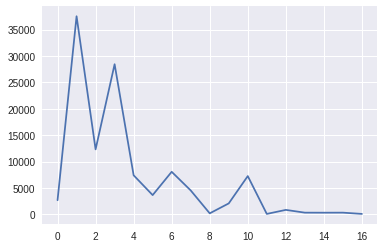

In [11]:
# Exploring the target variable class

train_tags = {}
for tags in train_labels_df['tags']:
    for tag in tags.split():
        if tag not in train_tags.keys():
    #         print("Not")
            train_tags[tag] = 0
        else:
            train_tags[tag] += 1
print(train_tags)
print("No. of Labels:", len(train_tags))
plt.plot(range(len(list(train_tags.keys()))), list(train_tags.values()))
plt.xticks()

Label: agriculture clear habitation primary road
Shape: (256, 256, 4)
Max: 255 ,Min: 0


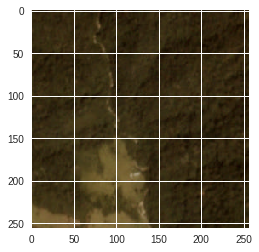

In [12]:
# A image from the dataset

i = 4
print("Label:", train_labels_df['tags'][i])
img_str = "train-jpg/train_" + str(i) + ".jpg"
img = plt.imread(img_str)
print("Shape:", img.shape)
print("Max:", img.max(), ",Min:", img.min())
plt.imshow(img)

# Create train and validation set

In [13]:
# print(type(img))
labels = list(train_tags.keys())
print("Labels are: " + str(labels))

<class 'numpy.ndarray'>
Labels are: ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [14]:
# Let's create a label_map for all the labels present

label_map = {}
inv_label_map = {}
inc = 0
for label in labels:
  label_map[label] = inc
  inv_label_map[inc] = label
  inc = inc + 1
print(label_map)
print(inv_label_map)

{'haze': 0, 'primary': 1, 'agriculture': 2, 'clear': 3, 'water': 4, 'habitation': 5, 'road': 6, 'cultivation': 7, 'slash_burn': 8, 'cloudy': 9, 'partly_cloudy': 10, 'conventional_mine': 11, 'bare_ground': 12, 'artisinal_mine': 13, 'blooming': 14, 'selective_logging': 15, 'blow_down': 16}
{0: 'haze', 1: 'primary', 2: 'agriculture', 3: 'clear', 4: 'water', 5: 'habitation', 6: 'road', 7: 'cultivation', 8: 'slash_burn', 9: 'cloudy', 10: 'partly_cloudy', 11: 'conventional_mine', 12: 'bare_ground', 13: 'artisinal_mine', 14: 'blooming', 15: 'selective_logging', 16: 'blow_down'}


In [0]:
import cv2
import numpy as np

In [0]:
x_train = []
y_train = []

In [0]:
# Making python list from the image data

for i, tags in (train_labels_df.values):
#   img = im.open('train-jpg/{}.jpg'.format(f))
  path = 'train-jpg/' + str(i) + '.jpg'
  targets = np.zeros(17)
  for t in tags.split(' '):
    targets[label_map[t]] = 1
  x_train.append(np.array(cv2.resize(img, (128, 128))))
  y_train.append(targets)

In [18]:
# Making numpy array from list made earlier and normalising by dividing by 255
y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.
print(x_train.shape)
print(y_train.shape)

(40479, 128, 128, 4)
(40479, 17)


In [19]:
# x_train[0]
print((x_train[0]), (y_train[0]))

[[[0.1882  0.1412  0.04706 1.     ]
  [0.2     0.153   0.05884 1.     ]
  [0.204   0.1569  0.06665 1.     ]
  ...
  [0.1882  0.1255  0.0392  1.     ]
  [0.1921  0.1333  0.05884 1.     ]
  [0.2079  0.149   0.0549  1.     ]]

 [[0.1726  0.1451  0.051   1.     ]
  [0.1804  0.1451  0.0549  1.     ]
  [0.1765  0.1333  0.0549  1.     ]
  ...
  [0.2     0.1216  0.0392  1.     ]
  [0.204   0.1412  0.051   1.     ]
  [0.2196  0.1608  0.0549  1.     ]]

 [[0.1921  0.1647  0.06665 1.     ]
  [0.2     0.1608  0.06665 1.     ]
  [0.196   0.1451  0.06274 1.     ]
  ...
  [0.204   0.1412  0.04706 1.     ]
  [0.2354  0.1843  0.0706  1.     ]
  [0.2432  0.2     0.08234 1.     ]]

 ...

 [[0.4314  0.3804  0.1882  1.     ]
  [0.4587  0.396   0.204   1.     ]
  [0.4746  0.4038  0.2235  1.     ]
  ...
  [0.1765  0.1451  0.051   1.     ]
  [0.1882  0.153   0.04315 1.     ]
  [0.1726  0.1412  0.04706 1.     ]]

 [[0.408   0.3372  0.1765  1.     ]
  [0.443   0.3647  0.196   1.     ]
  [0.4548  0.3687  0.204  

In [20]:
# Splitting the data into Training, Validation and Test set

test_split = int(40479*0.8)
print("Training set + Validation set: ", test_split)
x_train, x_test, y_train, y_test = x_train[:test_split], x_train[test_split:], y_train[:test_split], y_train[test_split:]

valid_split = int(40479*0.6)
print("Training set: ", valid_split)
x_train, x_valid, y_train, y_valid = x_train[:valid_split], x_train[valid_split:], y_train[:valid_split], y_train[valid_split:]

print("Validation set: ", str(test_split - valid_split))
print("Test set: ", str(40479 - test_split))

Training set + Validation set:  32383
Training set:  24287
Validation set:  8096
Test set:  8096


In [21]:
# Simple verification of the size of 3 sets

24287+8096+8096

40479

# Let's Begin

In [0]:
# Importing the modules

import tensorflow as tf
from tensorflow.python.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.python.keras import Model, Sequential, optimizers

In [0]:
# Setting up some hyperparameters

batch_size = 128
epochs = 10
learning_rate = 0.001
num_classes = 17

In [0]:
# The architecture of the CNN Model

model = Sequential()

model.add(BatchNormalization(input_shape = (128, 128, 4)))

model.add(Conv2D(32, 
                kernel_size = (3,3), 
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(48,
                kernel_size = (3,3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,
                kernel_size = (3,3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.7))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))

model.add(Dense(num_classes, activation = 'sigmoid'))


In [36]:
# Summary of CNN architecture

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 4)       16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        27712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [42]:
# Training the model

opt = optimizers.Adam(lr = learning_rate)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
m = model.fit(x = x_train, y= y_train, validation_data=(x_valid, y_valid),
                  batch_size=batch_size,verbose=2, epochs=epochs, shuffle = True)

Train on 24287 samples, validate on 8096 samples
Epoch 1/10
 - 41s - loss: 0.2568 - acc: 0.9050 - val_loss: 0.2567 - val_acc: 0.9054
Epoch 2/10
 - 40s - loss: 0.2565 - acc: 0.9050 - val_loss: 0.2564 - val_acc: 0.9054
Epoch 3/10
 - 40s - loss: 0.2565 - acc: 0.9050 - val_loss: 0.2566 - val_acc: 0.9054
Epoch 4/10
 - 40s - loss: 0.2563 - acc: 0.9050 - val_loss: 0.2566 - val_acc: 0.9054
Epoch 5/10
 - 40s - loss: 0.2566 - acc: 0.9050 - val_loss: 0.2563 - val_acc: 0.9054
Epoch 6/10
 - 40s - loss: 0.2564 - acc: 0.9050 - val_loss: 0.2568 - val_acc: 0.9054
Epoch 7/10
 - 40s - loss: 0.2563 - acc: 0.9050 - val_loss: 0.2568 - val_acc: 0.9054
Epoch 8/10
 - 40s - loss: 0.2562 - acc: 0.9050 - val_loss: 0.2580 - val_acc: 0.9054
Epoch 9/10
 - 40s - loss: 0.2563 - acc: 0.9050 - val_loss: 0.2569 - val_acc: 0.9054
Epoch 10/10
 - 40s - loss: 0.2563 - acc: 0.9050 - val_loss: 0.2568 - val_acc: 0.9054


In [37]:
# Running the model on test set

scores = model.evaluate(x_test, y_test, verbose = 0)
print(scores[1])

0.9053853882160111


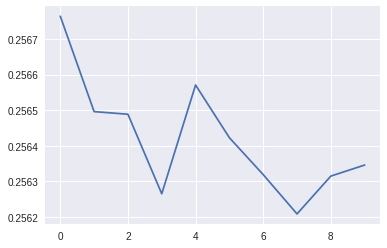

In [51]:
# Graph of loss and epoch

plt.plot(m.history['loss'])
plt.show()

In [0]:
predicted = model.predict(x_train[:256])
errors = np.absolute(y_train[:256] - predicted)

In [35]:
errors.shape

(256, 17)

In [0]:
p = model.predict(x_test[:256])

In [41]:
p

array([[0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859],
       [0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859],
       [0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859],
       ...,
       [0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859],
       [0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859],
       [0.05507027, 0.93775785, 0.3127047 , ..., 0.00598102, 0.00835965,
        0.00272859]], dtype=float32)